1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

2. Remove dodgy images

In [20]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [21]:
data_dir = 'data' 

In [22]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [23]:
image_exts[2]

'bmp'

In [24]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

112402-rabbit-lucky-animals-510x600.jpg
165355-single-male-elephant-in-the-masai-mara.jpg
176630e8ba63cd41521253e1c8d5f917.jpg
2g5760k80001000.jpeg
85120553.jpg
960x0.jpg
Animal-960x640.png
animal-day-16332888993x2.jpg
animal-protection-what-it-means-the-humane-league.jpg
animals-hub-v1-ambient-kids-still-1_3x4.jpg
animals-wildlife-shutterstock_1066200380.jpg
animals.jpg
animals_old_picture_high_res.jpeg
animalVoting.jpg
Animal_diversity.png
Animal_kingdom_nzwbda.jpg
cargo_live_animals_parrot.jpg
cat.jpg
cheetah-002.jpg
cheetahs-cubs-two-together-162318.jpeg
Coyote-animal-sentience-research.jpg
cute-baby-animals-1558535060.jpg
d41586-020-00548-w_17726710.jpg
dreamstime_m_76576144-scaled.jpg
emperorpenguin-getty-jpg-1567457680.jpg
end.jpg
farm-animals-cow.jpg
file-20190722-11355-1peled7.jpg
gettyimages-1052872052.jpg
GettyImages-1130384417-c635a0a.jpg
GettyImages-1145794687.jpg
gettyimages-1238924365_wide-b1f7435f5e1e69d0b3a32ad364de7204c89cc15e.jpg
gettyimages-168504892-1568303467.png


In [25]:
img=cv2.imread(os.path.join('data','animal','cat.jpg'))

In [26]:
img.shape

(533, 800, 3)

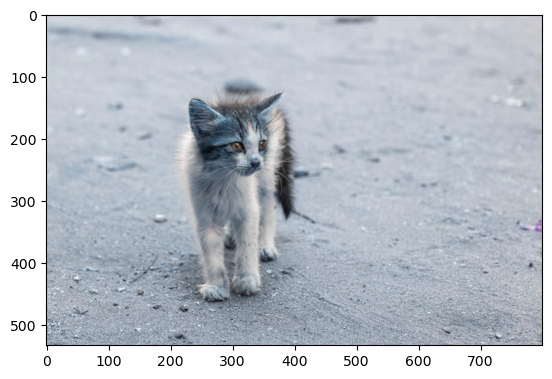

In [27]:
plt.imshow(img)

In [30]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

3. Load Data

In [31]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 206 files belonging to 2 classes.


In [38]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
data_iterator = data.as_numpy_iterator()

In [40]:
batch = data_iterator.next()

In [42]:
batch[0].shape

(32, 256, 256, 3)

In [43]:
batch[1]

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

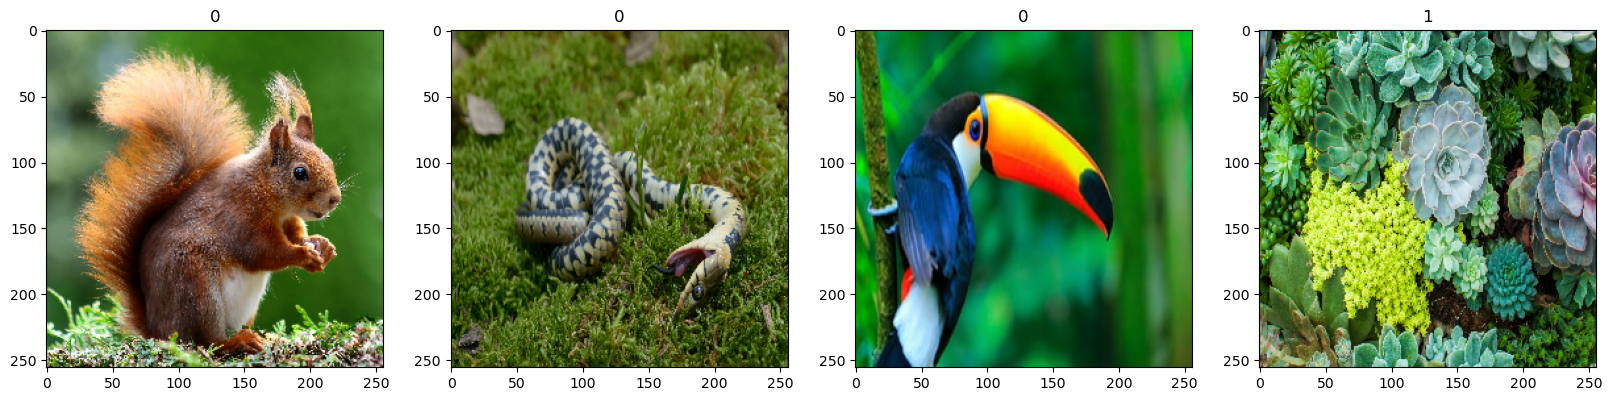

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [45]:
data = data.map(lambda x,y: (x/255, y))

In [47]:
scaled_iterator = data.as_numpy_iterator()

In [48]:
batch = scaled_iterator.next()

In [53]:
batch[0].min()

0.0

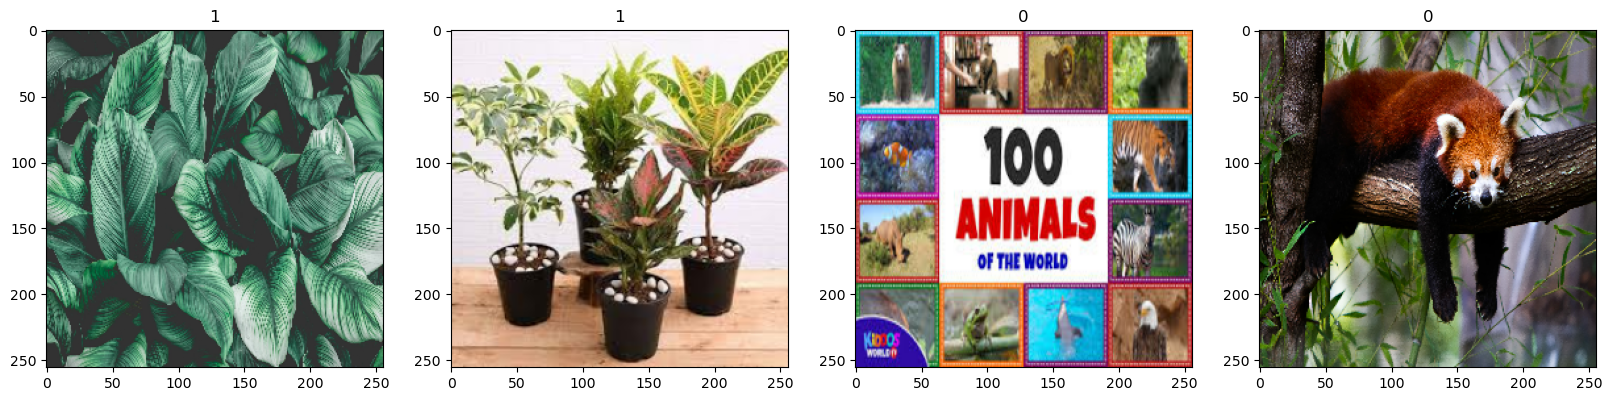

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

5. Split Data

In [61]:
len(data)

7

In [62]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [63]:
train_size+val_size+test_size

7

In [65]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [67]:
len(test)

1

6. Build Deep Learning Model

In [71]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [73]:
model = Sequential()

In [74]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.MaxPool2D", "keras.layers.MaxPooling2D")
class MaxPooling2D(Pooling2D):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output,
    when using the `"valid"` padding option, has a spatial shape
    (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    For example, for `strides=(1, 1)` and `padding="valid"`:

    >>

In [75]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [78]:
254/2

127.0

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

7. Train

In [80]:
logdir='logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 5s 900ms/step - loss: 1.2942 - accuracy: 0.5078 - val_loss: 0.6565 - val_accuracy: 0.5781
Epoch 2/20
4/4 [==============================] - 4s 1000ms/step - loss: 0.8203 - accuracy: 0.5391 - val_loss: 0.6926 - val_accuracy: 0.5312
Epoch 3/20
4/4 [==============================] - 4s 827ms/step - loss: 0.7003 - accuracy: 0.5859 - val_loss: 0.6658 - val_accuracy: 0.6094
Epoch 4/20
4/4 [==============================] - 4s 824ms/step - loss: 0.6639 - accuracy: 0.6484 - val_loss: 0.6277 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 4s 812ms/step - loss: 0.6485 - accuracy: 0.6172 - val_loss: 0.6555 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 4s 825ms/step - loss: 0.6198 - accuracy: 0.6719 - val_loss: 0.5925 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 4s 837ms/step - loss: 0.5451 - accuracy: 0.7578 - val_loss: 0.4896 - val_accuracy: 0.7188
Epoch 8/20
4/4 [===

In [84]:
hist.history

{'loss': [1.2941867113113403,
  0.8203081488609314,
  0.7003490924835205,
  0.6639205813407898,
  0.6485044956207275,
  0.6198307275772095,
  0.5450704097747803,
  0.5113489627838135,
  0.4901151657104492,
  0.37461942434310913,
  0.298392653465271,
  0.2464619129896164,
  0.19843392074108124,
  0.1582849621772766,
  0.16105252504348755,
  0.10159192234277725,
  0.0637407898902893,
  0.0691244900226593,
  0.036789752542972565,
  0.02617701329290867],
 'accuracy': [0.5078125,
  0.5390625,
  0.5859375,
  0.6484375,
  0.6171875,
  0.671875,
  0.7578125,
  0.765625,
  0.8046875,
  0.8515625,
  0.953125,
  0.9375,
  0.9375,
  0.953125,
  0.9375,
  0.96875,
  1.0,
  0.984375,
  1.0,
  1.0],
 'val_loss': [0.6565226316452026,
  0.6925733089447021,
  0.6657693386077881,
  0.6277251243591309,
  0.6555121541023254,
  0.592471182346344,
  0.4896118640899658,
  0.5565755367279053,
  0.41819334030151367,
  0.3669529855251312,
  0.27829980850219727,
  0.1509377360343933,
  0.241665780544281,
  0.1427

8. Plot Performance

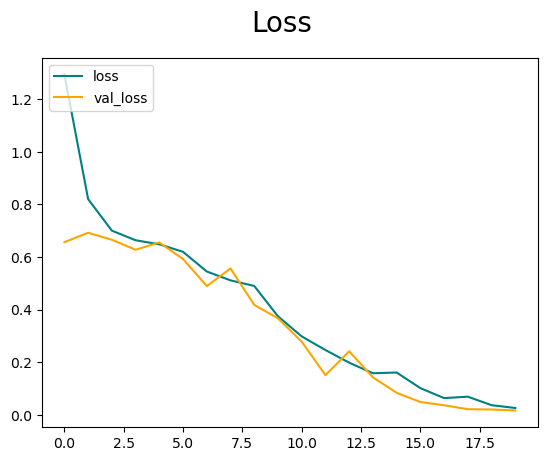

In [85]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

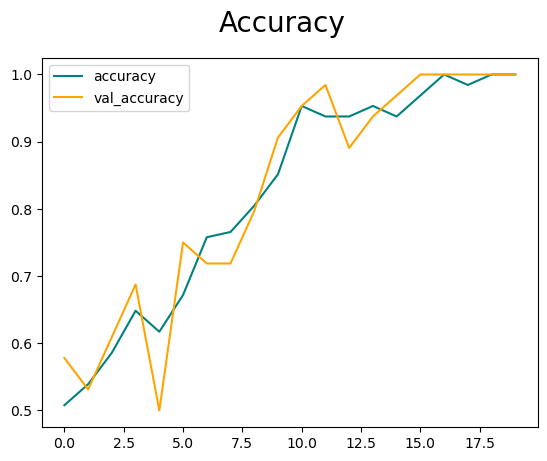

In [86]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluat

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [88]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [89]:
len(test)

1

In [90]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 107ms/step


In [93]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


10. Test

In [94]:
import cv2

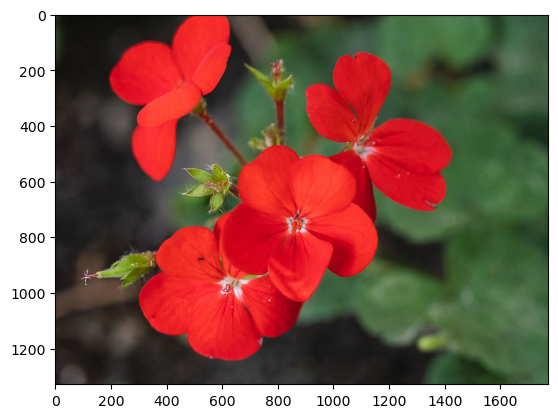

In [107]:
img = cv2.imread('planttest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

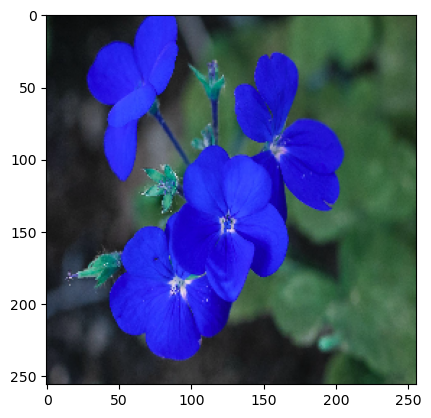

In [108]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
resize.shape

TensorShape([256, 256, 3])

In [110]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [111]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [112]:
yhat

array([[0.00045881]], dtype=float32)

In [113]:
if yhat > 0.5: 
    print(f'Predicted class is Animal')
else:
    print(f'Predicted class is Plant')

Predicted class is Plant


11. Save the Model

In [114]:
from tensorflow.keras.models import load_model

In [115]:
model.save(os.path.join('models','animalplantmodel.h5'))

In [119]:
new_model = load_model(os.path.join('models','animalplantmodel.h5'))

In [120]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


array([[0.00045881]], dtype=float32)

In [ ]:
if 